## Mood and Music

If you're anything more than a casual listener of music, you will find a strong correlation between a song and the emotions it invokes in you. Some hardcore listeners might even experience using music as a tool to manipulate or "hack" their emotions - listening to a particular song to switch from one mood to the next. For example - some people might play highly energetic music in their room when they're feeling lethargic, to get some momentum and start doing things. After a long day at work, another person might put on some relaxing "peaceful" music to switch from a hyper focused state to a more relaxed state of mind. "Somber" or "neutral" music is usually considered to be suited to listening while working, since it takes you into an objective state of mind. \
The [Gracenote Music API] 

## Dataset

We'll be using the [Gracenote Music Web API](https://developer.gracenote.com/web-api) to get mood information for Linkin Park's songs. [This blog post](http://www.gracenote.com/computing-musical-mood-at-gracenote/) contains more detailed information on the algorithms behind classification of mood of each song. We will be using a subset of the 25 moods used by Gracenote. Following are the moods we'll be using:

* Peaceful
* Sentimental
* Upbeat
* Sensual
* Serious
* Somber
* Exciting
* Energizing
* Aggressive

For those that didn't read the previous post, here is a quick recap of the 2 audio features (energy and valence) we'll be using to relate to the "mood" of a song:

* Energy - a number between 0 and 1 which is a perceptual measure of intensity and activity of a song. According to Spotify's API documentation :
> Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

* Valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by the track.
> Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

[Here]() is the script I used to get all the data, using Spotify Web API's python wrapper - [Spotipy]() and gracenote web API's python wrapper - [pygn]().

## Introductory Analysis

In [1]:
import pickle
data = pickle.load(open('lp-data-2.p', 'rb'))
data.drop(['tempo', 'loudness', 'duration'], inplace=True, axis=1)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
data.columns

Index([u'name', u'album', u'mood', u'energy', u'valence'], dtype='object')

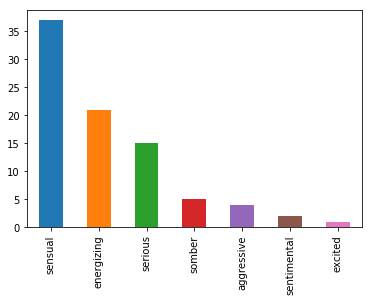

In [4]:
data.mood.value_counts().plot(kind='bar')

As we can see, most of LP's song come in the "Sensual" moood category, with "Energizing" and "Serious" being the second and third most popoular moods.

##### Examples of sensual, energetic and serious songs.
##### mention that due to mapping of moods from 25 to 9, they might not be super accurate. Mention about level1 moods

## Mood taxonomoy based on arousal-positivity scale

Here, I'm going to refer to some super interesting work done by Ting Neo on [Music Mood Clasification](https://neokt.github.io/projects/audio-music-mood-classification/). She defines these moods on a arousal-positivity scale. Esentially, moods are defined using 2 axis - Arousal, and Positivity. Her modelling of the 25 level 1 gracenote moods is done by having 5 separate classes for each axis. Since I have narrowed it down to 9 moods, we'll be having 3 classes on each scale. This is how it looks like:

![Moods](images/moodss.png "Moods")


## image

## LP's albums on mood taxonomy scale

Analyzing the moods of individual songs in the albums can get complicated really quick, since there are 9 moods and 7 albums. Instead, lets try to represent the albums on the mood taxonomy scale. We'll try to do this in two ways - first, more discrte way is by using the above scale. The other - using the 2 attributes of energy and valence defined above. This will become clearer as we progress.

As you can see in the above scale, moods are represented using level of arousal and level of positivity. Lets create 2 mappings from each mood - one mapping the mood to level of arousal, and the other, to the level of positivity.

In [5]:
mood_positiveness = {
    'peaceful' : 1, 'upbeat' : 1, 'excited': 1,
    'sentimental' : 0, 'sensual' : 0, 'energizing' : 0,
    'somber' : -1, 'serious': -1, 'aggressive' : -1
}
mood_energeticness = {
    'excited' : 1, 'energizing' : 1, 'aggressive': 1,
    'upbeat' : 0, 'sensual' : 0, 'serious' : 0,
    'peaceful' : -1, 'sentimental': -1, 'somber' : -1
}
data['positiveness'] = data.mood.apply(lambda a: mood_positiveness[a])  
data['energeticness'] = data.mood.apply(lambda a: mood_energeticness[a])  

Now, lets plot LP's albums on the mood taxonomy scale.

## basically, just draw lines, and color between them

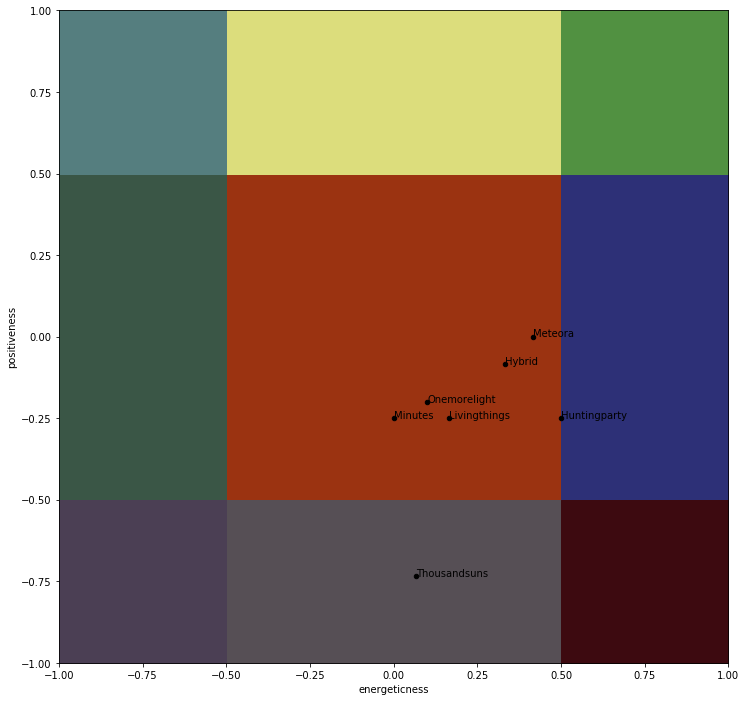

In [39]:
import numpy as np
plt.rcParams['figure.figsize'] = (12,12)
b = data.groupby('album')['positiveness', 'energeticness'].mean()
fig, ax = plt.subplots()
plt.xlim(-1,1)
plt.ylim(-1,1)

#sensual
plt.fill_between(np.linspace(-0.5,0.5,200), 0.5, -0.5, color='#9b3311')
#energizing
plt.fill_between(np.linspace(0.5,1,200), 0.5, -0.5, color='#2d3077')  
#sentimental
plt.fill_between(np.linspace(-0.5,-1,200), 0.5, -0.5, color='#3a5646')  

#upbeat
plt.fill_between(np.linspace(-0.5,0.5,200), 0.5, 1.0, color='#dcdd7c')    
#excited
plt.fill_between(np.linspace(0.5,1,200), 0.5, 1.0, color='#519141') 
#peaceful
plt.fill_between(np.linspace(-0.5,-1,200), 0.5, 1.0, color='#557e7f')  

#serious
plt.fill_between(np.linspace(-0.5,0.5,200), -0.5, -1.0, color = '#564f55')
#aggressive
plt.fill_between(np.linspace(0.5,1,200), -0.5, -1.0, color='#3d0a10')  
#somber
plt.fill_between(np.linspace(-0.5,-1,200), -0.5, -1.0, color='#4b3f54')  

b.plot('energeticness', 'positiveness', kind='scatter', ax=ax, color='k')
for k, v in b.iterrows():
    ax.text(v['energeticness'], v['positiveness'], k)

In [28]:
the 0.5 thing is arbritary - talk about how, if gracenote used this paarticular 
model with this thrshold,  it would have worked.

SyntaxError: invalid syntax (<ipython-input-28-8556ea468f94>, line 1)

Hybrid Theory, Meteora were high energy albums, with dark, negative themes, but little depth in those themes. Hence, their positiveness is greater than the other albums. Hunting Party was similar in the sense of being high energy, but had more depth in the negative themes. Minutes to Midnight, One more Light, and Living Things seem to follow in another category. A Thousand Suns seems to be the outlier here, which can probably be related to it being a concept album.

## LP's albums on energy-valence scale

Now, lets plot LP's albums on the energy-valence scale. Esentially, we are just taking the mean of energy and valence for all songs for each album. This is a more "continuous" version of the previous graph.

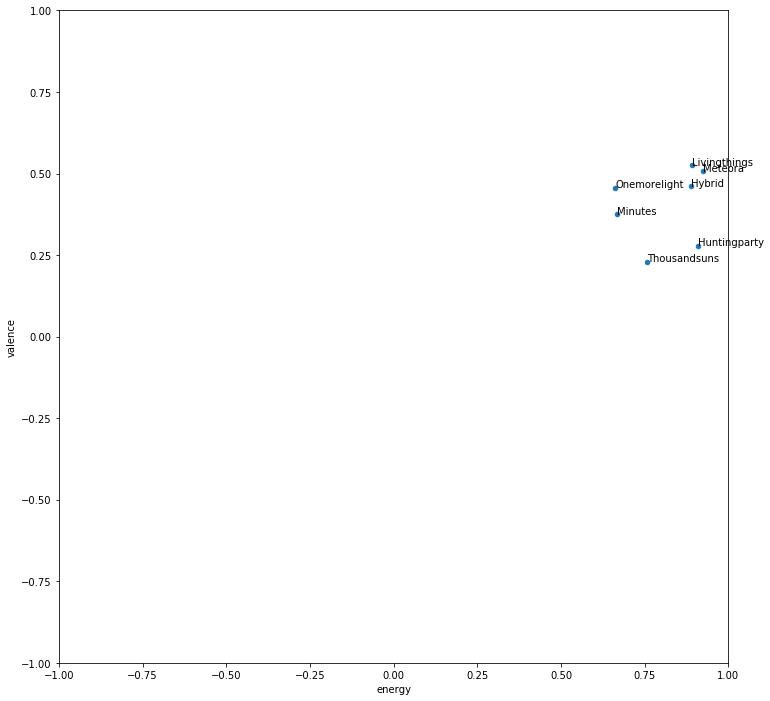

In [12]:
b = data.groupby('album')['energy', 'valence'].mean()
fig, ax = plt.subplots()
plt.xlim(-1,1)
plt.ylim(-1,1)
b.plot('energy', 'valence', kind='scatter', ax=ax)
for k, v in b.iterrows():
    ax.text(v['energy'], v['valence'], k)

Here, contrasting to the previous graph, Living Things, Meteora and Hybrid Theory seems to form a common cluster. One more Light and Minutes with another, and a thousand suns and Hunting party, both forming their own mini clusters. 

What's the difference between the two graphs? One is based on discrete mood labels defined by third party service and model of energy and positivity created on those mood labels. The other, is based on means of continuous attributes for each song in each album. 

Why did we look at the same model in two different ways? Merely, for clarity. After looking at the second graph, our analysis of putting Hunting Party in the same cluster as Meteora and Hybrid Theory seems a bit hasty. It makes more sense to put Hunting Party and a Thousand suns in completely different independent clusters. 